In [2]:
import sys
import os
from typing import Tuple
import pandas

sys.path.append('/home/danillorp/Área de Trabalho/github/fema/src/')


import fema_semi
import fema_classifier
import fema_regression
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [3]:
def generate_random_points_2d(n_points):
    """
    Generate N random points in 2D space.
    
    Parameters:
    n_points (int): Number of random points to generate.
    
    Returns:
    numpy.ndarray: Array of shape (n_points, 2) containing random 2D points.
    """
    # Generate random x and y coordinates in the range [0, 100)
    x_coords = np.random.rand(n_points) * 100
    y_coords = np.random.rand(n_points) * 100
    
    # Combine x and y coordinates into a single array
    points = np.column_stack((x_coords, y_coords))
    
    return points

    

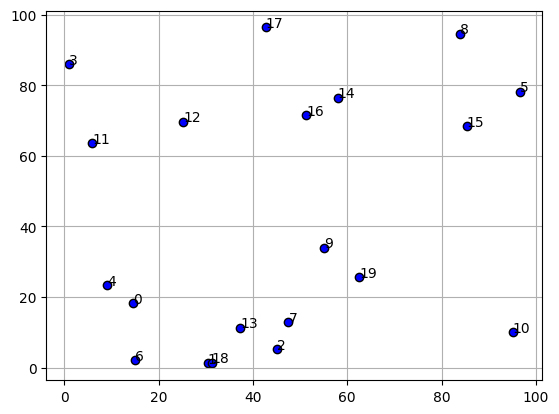

In [4]:
# Number of random points to generate
N = 20

# Generate random 2D points
points = generate_random_points_2d(N)

fig, ax = plt.subplots()

# Plot the generated points
ax.scatter(points[:, 0], points[:, 1], c='blue', marker='o', edgecolors='black')
#ax.title(f'{N} Random 2D Points')
#ax.xlabel('X Coordinate')
#ax.ylabel('Y Coordinate')
ax.grid(True)

for i, txt in enumerate(range(N)):
    ax.annotate(txt, (points[i,0], points[i,1]))

plt.show()

In [5]:
points_list = points.tolist()
points_list_aux = points_list.copy()

dist_matrix = np.zeros((N, N))
weigth_matrix = np.zeros((N, N))


z = 2

for (p,ind) in zip(points_list,range(0,len(points_list))):
    dist = np.array(
            [np.linalg.norm(points[i]-p) for i in range(len(points))]
            )
    dist_matrix[ind,:] = dist
    dist_matrix[ind,ind] = 10**20

    weigth_matrix[ind,:] = 1.0/(dist_matrix[ind,:]**z)
    weigth_matrix[ind,:] = weigth_matrix[ind,:]/sum(weigth_matrix[ind,:]+1**-20)


    
print(dist_matrix)
print('\n')
print(weigth_matrix)
      
        

[[1.00000000e+20 2.33101150e+01 3.32778408e+01 6.91946752e+01
  7.52567642e+00 1.01611351e+02 1.61991944e+01 3.34320749e+01
  1.03294863e+02 4.35053713e+01 8.09870117e+01 4.61847256e+01
  5.26078692e+01 2.38156648e+01 7.26574160e+01 8.67773779e+01
  6.48382764e+01 8.31482263e+01 2.37661512e+01 4.86027976e+01]
 [2.33101150e+01 1.00000000e+20 1.53045618e+01 8.98859560e+01
  3.08211448e+01 1.01553999e+02 1.54813395e+01 2.07361432e+01
  1.07803383e+02 4.10905764e+01 6.53050088e+01 6.70673477e+01
  6.87623784e+01 1.22833078e+01 8.02051524e+01 8.68404320e+01
  7.35035007e+01 9.60881833e+01 9.24140204e-01 4.04265603e+01]
 [3.32778408e+01 1.53045618e+01 1.00000000e+20 9.21637113e+01
  4.04333043e+01 8.92739141e+01 3.03798734e+01 7.99283058e+00
  9.75499300e+01 3.04612489e+01 5.01743932e+01 7.03324143e+01
  6.75065625e+01 9.92881313e+00 7.24041606e+01 7.48923117e+01
  6.66912892e+01 9.12684904e+01 1.43805876e+01 2.68424694e+01]
 [6.91946752e+01 8.98859560e+01 9.21637113e+01 1.00000000e+20
  6.3

In [6]:
conquest = np.zeros(N)
conquested = np.zeros(N)
splited = np.zeros(N)

for i in range(len(points)):
   if i == 36:
      print(np.argsort(weigth_matrix[i,:])[N-1])
   conquest[i] = np.argsort(weigth_matrix[i,:])[N-1]
   splited[i]  = np.argsort(weigth_matrix[i,:])[1]

print(conquest)
print(splited)

for i in range(len(points)):
   if (i == int(conquest[int(conquest[i])])) & (i != int(splited[int(conquest[i])])):
      if i <= int(conquest[i]):
         conquested[i] = i
         conquested[int(conquest[i])] = i
         print(i,int(conquest[i]),int(conquest[int(conquest[i])]))
      else:
         print('passou',i,int(conquest[i]),int(conquest[int(conquest[i])]))
         #conquested[i] = i
   else:
      print('NAO ',i,int(conquest[i]),int(conquest[int(conquest[i])]))
      conquested[i] = i

print(conquest)
print(conquested)


[ 4. 18.  7. 11.  0. 15.  1.  2.  5. 19. 19. 12. 11.  2. 16.  5. 14. 14.
  1.  9.]
[ 8.  8.  8. 10.  8.  6.  8.  8.  6.  3.  3. 10. 10.  8.  6.  6.  6. 10.
  8.  3.]
0 4 0
1 18 1
2 7 2
NAO  3 11 12
passou 4 0 4
5 15 5
NAO  6 1 18
passou 7 2 7
NAO  8 5 15
9 19 9
NAO  10 19 9
11 12 11
passou 12 11 12
NAO  13 2 7
14 16 14
passou 15 5 15
passou 16 14 16
NAO  17 14 16
passou 18 1 18
passou 19 9 19
[ 4. 18.  7. 11.  0. 15.  1.  2.  5. 19. 19. 12. 11.  2. 16.  5. 14. 14.
  1.  9.]
[ 0.  1.  2.  3.  0.  5.  6.  2.  8.  9. 10. 11. 11. 13. 14.  5. 14. 17.
  1.  9.]


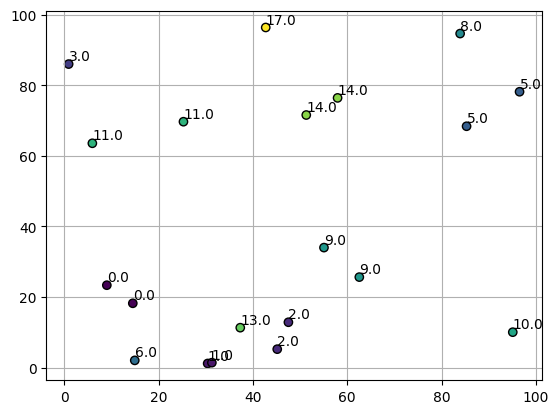

In [7]:
fig, ax = plt.subplots()

# Plot the generated points
ax.scatter(points[:, 0], points[:, 1], c=conquested, marker='o', edgecolors='black')
#ax.title(f'{N} Random 2D Points')
#ax.xlabel('X Coordinate')
#ax.ylabel('Y Coordinate')
ax.grid(True)

for i in range(len(conquested)):
    ax.annotate(conquested[i], (points[i,0], points[i,1]+1))

plt.show()

In [8]:
nivel_1 = np.zeros(len(set(conquested)))

for i,j in enumerate(set(conquested)):
    print(i,j)
    print(np.where(conquested == j)[0].tolist())
    print(weigth_matrix[np.where(conquested == j)[0].tolist(),0])


0 0.0
[0, 4]
[4.99209314e-42 8.81635660e-04]
1 1.0
[1, 18]
[8.68358460e-05 8.35310115e-05]
2 2.0
[2, 7]
[4.50559330e-05 4.46474063e-05]
3 3.0
[3]
[1.04397183e-05]
4 5.0
[5, 15]
[4.84018115e-06 6.63604937e-06]
5 6.0
[6]
[0.00019035]
6 8.0
[8]
[4.68427853e-06]
7 9.0
[9, 19]
[2.63924760e-05 2.11466055e-05]
8 10.0
[10]
[7.62146606e-06]
9 11.0
[11, 12]
[2.34302160e-05 1.80565908e-05]
10 13.0
[13]
[8.79675351e-05]
11 14.0
[14, 16]
[9.46025511e-06 1.18794159e-05]
12 17.0
[17]
[7.22927493e-06]


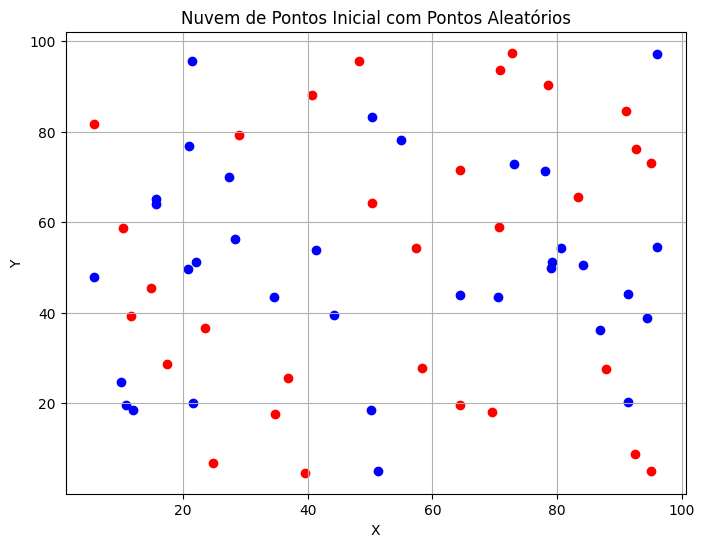

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Função para gerar pontos aleatórios
def generate_random_points(min_x, max_x, min_y, max_y, num_points):
    return np.random.uniform(min_x, max_x, num_points), np.random.uniform(min_y, max_y, num_points)

# Função para filtrar pontos próximos aos pontos de NP
def filter_nearby_points(random_x, random_y, np_x, np_y, min_distance):
    filtered_x, filtered_y = [], []
    
    for x, y in zip(random_x, random_y):
        # Verifica a distância mínima entre o ponto aleatório e os pontos de NP
        distances = np.sqrt((np_x - x)**2 + (np_y - y)**2)
        
        if np.all(distances >= min_distance):
            filtered_x.append(x)
            filtered_y.append(y)
    
    return filtered_x, filtered_y


def lists_to_np_array(list1, list2):
    # Convertendo as listas para arrays NumPy
    array1 = np.array(list1)
    array2 = np.array(list2)
    
    # Unindo os arrays em um array 2D
    coordinates = np.column_stack((array1, array2))
    
    return coordinates


N = 30
points = generate_random_points_2d(N)

# Nuvem de pontos inicial (NP)
np_x = points[:,0]
np_y = points[:,1]

# Coordenadas mínimas e máximas
min_x, max_x = np.min(np_x) - 1, np.max(np_x) + 1
min_y, max_y = np.min(np_y) - 1, np.max(np_y) + 1

# Número de pontos aleatórios
num_points = 2*N

# Distância mínima dos pontos gerados em relação aos pontos de NP
min_distance = 7.0

# Gerar pontos aleatórios
random_x, random_y = generate_random_points(min_x, max_x, min_y, max_y, num_points)

# Filtrar pontos próximos aos pontos de NP
filtered_x, filtered_y = filter_nearby_points(random_x, random_y, np_x, np_y, min_distance)

# Plotar pontos
plt.figure(figsize=(8, 6))
plt.scatter(np_x, np_y, color='red', label='Nuvem de Pontos Inicial (NP)')
plt.scatter(filtered_x, filtered_y, color='blue', label='Pontos Aleatórios')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Nuvem de Pontos Inicial com Pontos Aleatórios')
#plt.legend()
plt.grid(True)
plt.show()


In [10]:
samples = points.copy()
non_samples = lists_to_np_array(filtered_x, filtered_y)

print(samples.shape,non_samples.shape,len(filtered_y))

joined_samples = np.concatenate((samples, non_samples))

print(joined_samples.shape)

labels = np.zeros(joined_samples.shape[0],dtype=int)
labels[:samples.shape[0]] = 1
labels[samples.shape[0]:] = 0
print(labels)
print(labels.shape)




(30, 2) (34, 2) 34
(64, 2)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(64,)


Primeiros 10 pontos:
[[24.85221055  6.69072984]
 [70.63581745 59.03679269]
 [69.56297907 18.07261619]
 [70.88057776 93.71148637]
 [64.43275847 71.47001192]
 [10.46163095 58.6367995 ]
 [57.34278954 54.21986038]
 [64.50733234 19.66693661]
 [29.00345787 79.19888971]
 [92.47296105  8.85001399]]


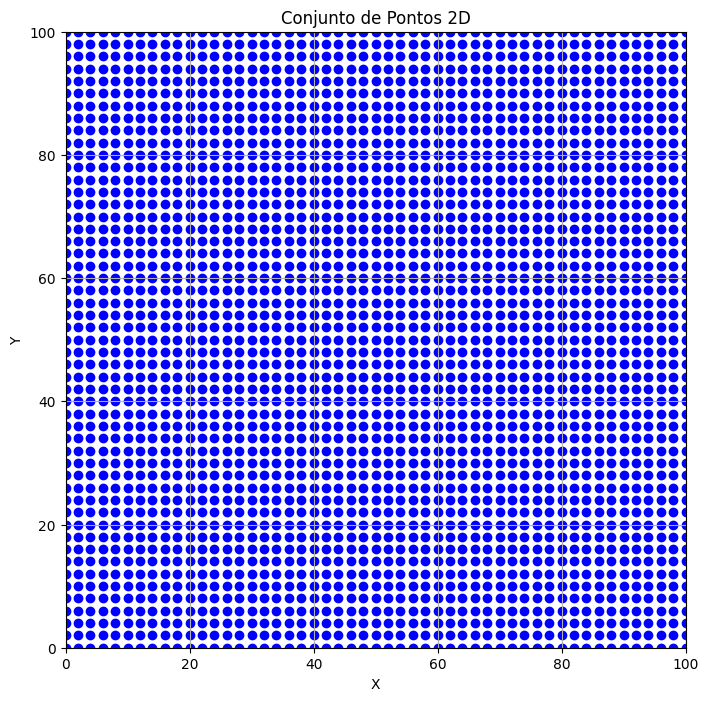

In [11]:
# Definindo os limites do espaço
x_min, x_max = 0, 100
y_min, y_max = 0, 100

# Definindo o passo
step = 2

# Gerando os pontos usando np.meshgrid
x_values = np.arange(x_min, x_max + step, step)
y_values = np.arange(y_min, y_max + step, step)

xx, yy = np.meshgrid(x_values, y_values)

# Convertendo os pontos gerados em um único conjunto de pontos 2D
test = np.column_stack((xx.ravel(), yy.ravel()))

print("Primeiros 10 pontos:")
print(points[:10])

# Plotando os pontos (opcional)
plt.figure(figsize=(8, 8))
plt.scatter(test[:, 0], test[:, 1],  c='blue')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conjunto de Pontos 2D')
plt.grid(True)
plt.show()

In [12]:
model = fema_classifier.FEMaClassifier(k=10,basis=fema_regression.Basis.shepardBasis)
model.fit(joined_samples,labels.reshape((len(labels),1)))



pred, prob = model.predict(test,3)


In [13]:
model.probability_classes

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

51


(array([1278.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1323.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

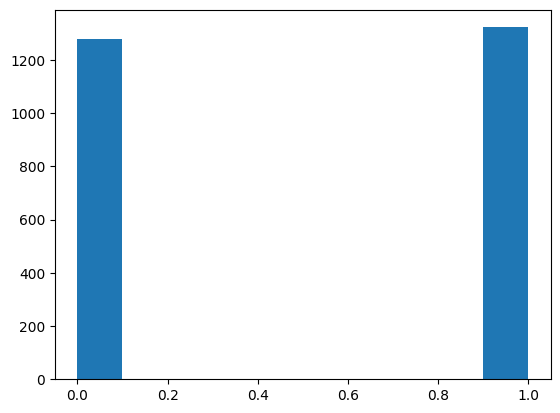

In [14]:
np.unique(pred)
print(len(xx))
plt.hist(pred)

(array([1278.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1323.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

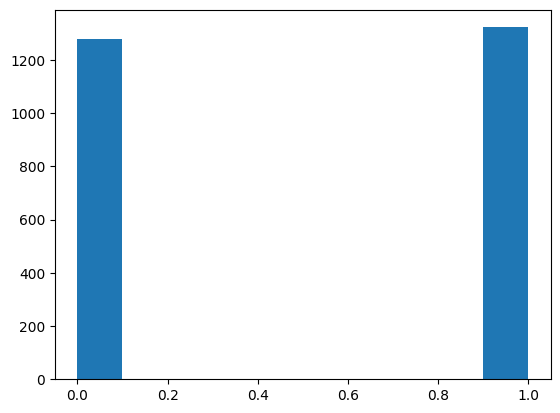

In [15]:
pred_img = np.array(pred).reshape((xx.shape[0],yy.shape[0]))
pred_img = pred_img


plt.hist(pred_img.ravel())

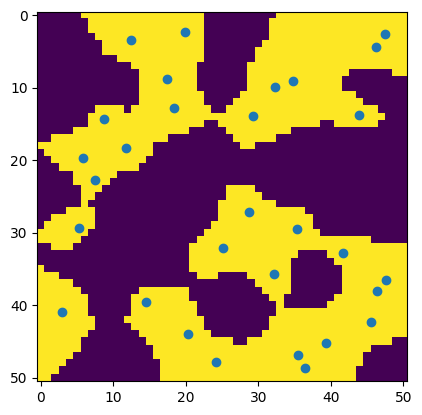

In [16]:
plt.imshow(pred_img)
plt.scatter(points[:,0]/2,points[:,1]/2)

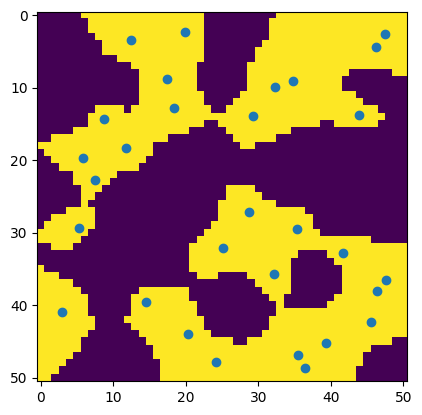

In [17]:
pred_img_th = np.where(pred_img > 0.1, 1, 0)

plt.imshow(pred_img_th)
plt.scatter(points[:,0]/2,points[:,1]/2)

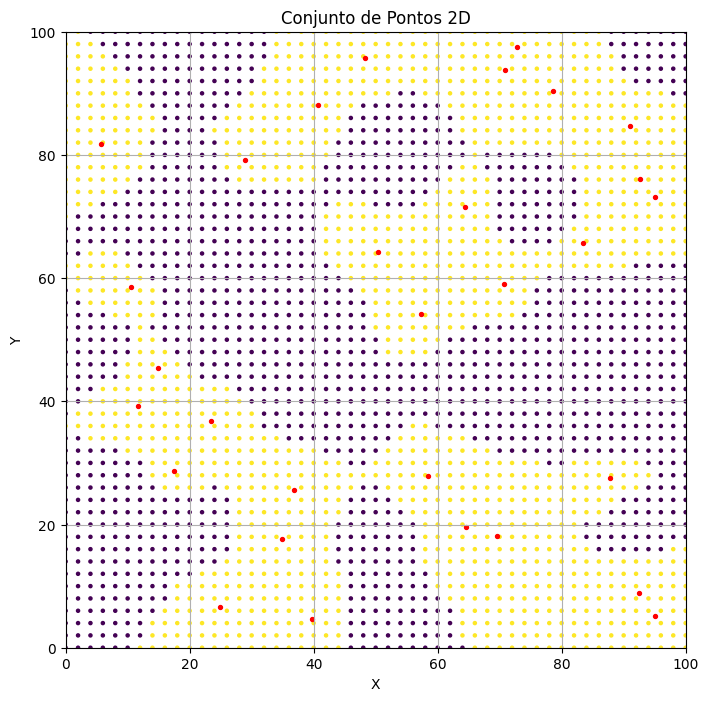

In [18]:
# Plotando os pontos (opcional)
plt.figure(figsize=(8, 8))
plt.scatter(test[:, 0], test[:, 1], s=5, c=pred)
plt.scatter(points[:, 0], points[:, 1], s=8, c='red')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conjunto de Pontos 2D')
plt.grid(True)
plt.show()

In [19]:
prob

array([[0.65392484, 0.34607276],
       [0.64659722, 0.35340069],
       [0.63318086, 0.36681731],
       ...,
       [0.98413794, 0.01586204],
       [0.97721138, 0.02278858],
       [0.94847156, 0.05152833]])

(array([578., 209., 164., 163., 164., 144., 147., 201., 288., 543.]),
 array([1.99035061e-05, 1.00014270e-01, 2.00008637e-01, 3.00003004e-01,
        3.99997371e-01, 4.99991737e-01, 5.99986104e-01, 6.99980471e-01,
        7.99974838e-01, 8.99969205e-01, 9.99963571e-01]),
 <BarContainer object of 10 artists>)

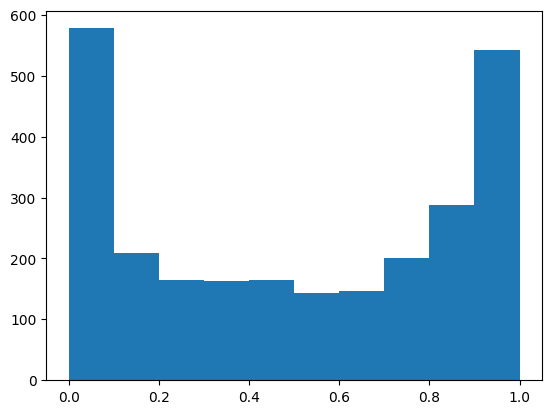

In [20]:
pred_img = np.array(prob[:,1]).reshape((xx.shape[0],yy.shape[0]))
pred_img = pred_img


plt.hist(pred_img.ravel())

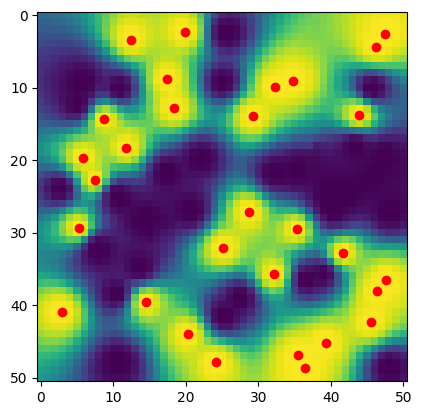

In [21]:
plt.imshow(pred_img)
plt.scatter(points[:,0]/2,points[:,1]/2,c='red')

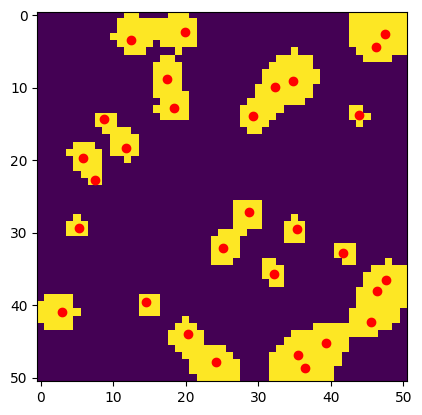

In [22]:
pred_img_th = np.where(pred_img > 0.9, 1, 0)

plt.imshow(pred_img_th)
plt.scatter(points[:,0]/2,points[:,1]/2,c='red')


In [23]:
qtd_samples = samples.shape[0]
input_points = samples.copy()
dist_matrix = np.zeros((qtd_samples,qtd_samples))

qtd_diff_samples = 50
th_same_cluster = 0.9

print(dist_matrix.shape) 

for i in range(qtd_samples):
    for j in range(qtd_samples):
        if i == j:
            dist_matrix[i,i] = 1
            continue
        if i > j:
            continue
        diff = (input_points[i] - input_points[j])/(qtd_diff_samples-1)
        test_samples = np.zeros((qtd_diff_samples,2))
        for k in range(qtd_diff_samples):
            test_samples[k] = (0.999*input_points[i] - diff*k)
        pred, prob = model.predict(test_samples,3)
        if len(pred[prob[:,1] < th_same_cluster]) > 0:
            dist_matrix[i,j] = 0
            dist_matrix[j,i] = 0
            if i == 14 and j == 17:
                print(test_samples)
                print(input_points[i],input_points[j])
                print(i,j,len(pred[prob[:,1] < th_same_cluster]),prob)
        else:
            dist_matrix[i,j] = 1
            dist_matrix[j,i] = 1





(30, 30)
[[ 5.72709192 81.66661763]
 [ 6.41933665 80.09312291]
 [ 7.11158137 78.51962819]
 [ 7.80382609 76.94613347]
 [ 8.49607082 75.37263875]
 [ 9.18831554 73.79914403]
 [ 9.88056026 72.22564931]
 [10.57280499 70.65215459]
 [11.26504971 69.07865987]
 [11.95729443 67.50516514]
 [12.64953916 65.93167042]
 [13.34178388 64.3581757 ]
 [14.0340286  62.78468098]
 [14.72627333 61.21118626]
 [15.41851805 59.63769154]
 [16.11076277 58.06419682]
 [16.8030075  56.4907021 ]
 [17.49525222 54.91720738]
 [18.18749694 53.34371266]
 [18.87974167 51.77021794]
 [19.57198639 50.19672322]
 [20.26423111 48.6232285 ]
 [20.95647584 47.04973378]
 [21.64872056 45.47623906]
 [22.34096528 43.90274434]
 [23.03321001 42.32924962]
 [23.72545473 40.7557549 ]
 [24.41769945 39.18226018]
 [25.10994418 37.60876546]
 [25.8021889  36.03527074]
 [26.49443362 34.46177601]
 [27.18667835 32.88828129]
 [27.87892307 31.31478657]
 [28.57116779 29.74129185]
 [29.26341252 28.16779713]
 [29.95565724 26.59430241]
 [30.64790196 25.02

In [24]:
print("Matriz de Adjacência:")
print(dist_matrix - np.identity(dist_matrix.shape[0]))


Matriz de Adjacência:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.

In [25]:
import numpy as np

def expand_adjacency_matrix(dist_matrix):
    num_vertices = dist_matrix.shape[0]
    expanded_matrix = np.zeros((num_vertices, num_vertices))

    # Conectar cada vértice aos seus vizinhos e aos vizinhos dos vizinhos
    for i in range(num_vertices):
        for j in range(num_vertices):
            if dist_matrix[i, j] != 0:
                expanded_matrix[i, j] = 1  # Conectar vértice aos vizinhos
                for k in range(num_vertices):
                    if dist_matrix[j, k] != 0 and k != i:
                        expanded_matrix[i, k] = 1  # Conectar vértice aos vizinhos dos vizinhos
            

    return expanded_matrix

# Expandir a matriz de adjacência
expanded_matrix = expand_adjacency_matrix(dist_matrix)

print("Matriz de Adjacência:")
print(dist_matrix)

for i in range(10):
    expanded_matrix = expand_adjacency_matrix(expanded_matrix)
    
print("Matriz de Adjacência Expandida:")
print(expanded_matrix)


Matriz de Adjacência:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.

In [26]:
from collections import deque

def label_connected_components(adjacency_matrix):
    num_vertices = len(adjacency_matrix)
    visited = [False] * num_vertices
    labels = [-1] * num_vertices  # Inicialmente, todos os vértices têm rótulo -1
    current_label = 0

    for vertex in range(num_vertices):
        if not visited[vertex]:
            # Começar uma nova busca em largura a partir do vértice não visitado
            bfs_queue = deque([vertex])
            visited[vertex] = True

            while bfs_queue:
                current_vertex = bfs_queue.popleft()
                labels[current_vertex] = current_label

                # Encontrar vizinhos não visitados e adicioná-los à fila
                for neighbor in range(num_vertices):
                    if adjacency_matrix[current_vertex][neighbor] == 1 and not visited[neighbor]:
                        bfs_queue.append(neighbor)
                        visited[neighbor] = True

            current_label += 1  # Atualizar o rótulo para o próximo conjunto de pontos interconectados

    return labels


# Obter os rótulos dos conjuntos de pontos interconectados
labels = label_connected_components(expanded_matrix)

print("Rótulos dos Conjuntos de Pontos Interconectados:")
print(labels)



Rótulos dos Conjuntos de Pontos Interconectados:
[0, 1, 2, 3, 4, 5, 6, 2, 7, 8, 3, 3, 2, 8, 9, 10, 3, 0, 11, 12, 3, 13, 14, 3, 12, 14, 13, 11, 6, 15]


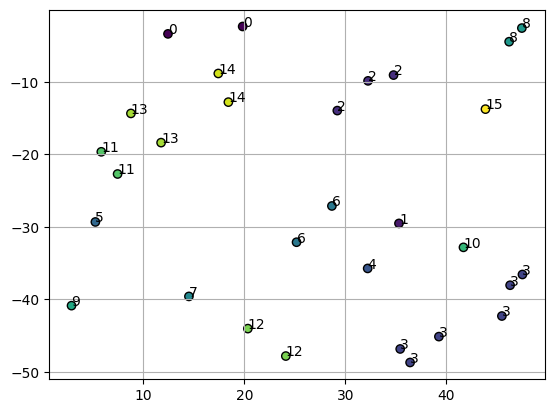

In [27]:
fig, ax = plt.subplots()

# Plot the generated points
ax.scatter(points[:, 0]/2, -points[:, 1]/2, c=labels, marker='o', edgecolors='black')
#ax.title(f'{N} Random 2D Points')
#ax.xlabel('X Coordinate')
#ax.ylabel('Y Coordinate')
ax.grid(True)

for i, txt in enumerate(range(N)):
    ax.annotate(labels[i], (points[i,0]/2, -points[i,1]/2))

plt.show()

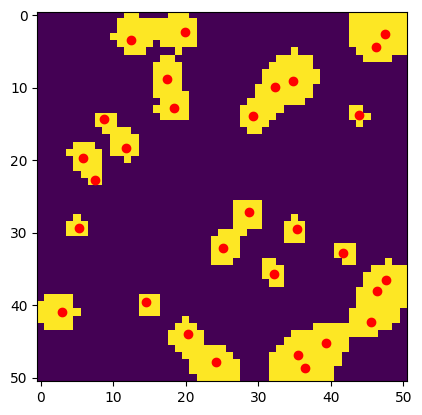

In [28]:
pred_img_th = np.where(pred_img > th_same_cluster, 1, 0)

plt.imshow(pred_img_th)
plt.scatter(points[:,0]/2,points[:,1]/2,c='red')
for i, txt in enumerate(range(N)):
    ax.annotate(txt, (points[i,0]/2, points[i,1]/2))

plt.show()
